In [38]:
import numpy as np
from scipy.special import hermite as H_n
from scipy.special import factorial as fac
from scipy.constants import hbar
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.use("pgf")
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

# 1. Numerov algorithm for the Schrödinger eqtuation

Text(0.5, 1.0, 'Analytical solutions for a quantmechanical oscilator')

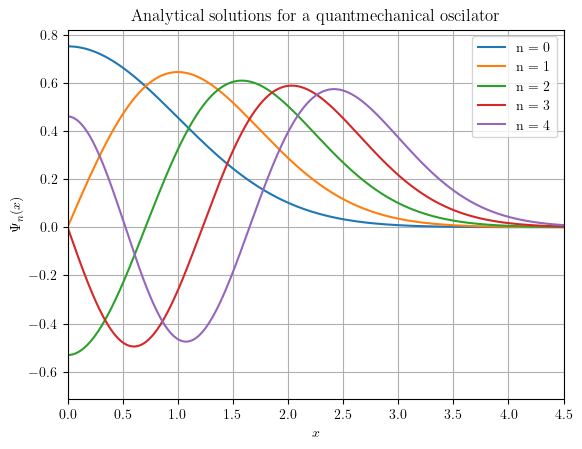

In [64]:
%matplotlib inline
#plotting analytical solutions
def psi_n(n,x):
    g_n = H_n(i)
    return g_n(x)/(2**i*fac(i)*np.sqrt(np.pi))**(1/2)*np.exp(-x**2/2)

for i in range(0,5):
    x = np.linspace(-5,5,1000)
    plt.grid()
    plt.plot(x,psi_n(i,x), label = 'n = {}'.format(i))
plt.xlim(0,4.5)
plt.legend()
plt.ylabel(r'$\Psi$$_n$($x$)')
plt.xlabel(r'$x$')
plt.title(r'Analytical solutions for a quantmechanical oscilator')

In [120]:
def E_n(n,w):
    return (n+1/2)*hbar*w

def k_0(x,n):
    return(2*(n+1/2) -x**2)

def n_step(y0,y1,x0,n,h,k):
    
    yn = (2-5/6*h**2*k(x0+h,n))*y1 
    yn = yn- (1+1/12*h**2*k(x0,n))*y0
    yn = yn/(1+1/12*h**2*k(x0+2*h,n))

    xn = x0+2*h
    return yn,xn

def numerov(x0,n,h,e,k):
    #number of steps
    N = int(e/h)
    
    yn = np.zeros(N+1)
    kn = np.zeros(N+1)
    xn = np.zeros(N+1)
    
    y0 = psi_n(n,x0)
    #setting initial values for sym. and antisym. solutions 
    if n%2 == 0:
        yn[0] = y0
        yn[1] = yn[0] - h**2*k(x0,n)*yn[0]/2
    elif n%2 != 0:
        yn[0] = 0
        yn[1] = y0+0.011
    kn[0]= k(x0,n)
    kn[1] = k(x0+h,n)
    
    xn[0] = x0
    xn[1] = x0+h
    #loop to integrate the y
    for i in range(2,N+1):
        yn[i],xn[i]=  n_step(yn[i-2],yn[i-1],xn[i-2],n,h,k)
        
    return yn,xn

Text(0.5, 1.0, 'Numerical solutions for a quantmechanical oscilator')

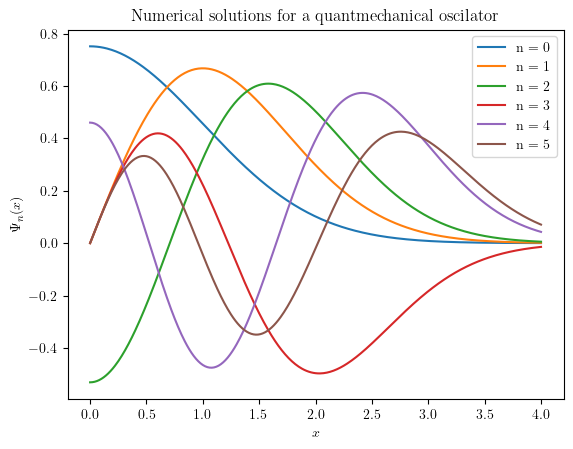

In [122]:
for i in range(0,6):
    y0,x0 = numerov(x0 = 0,n = i, h= 0.01, e = 4, k = k_0)
    plt.plot(x0,y0, label = 'n = {}'.format(i))
    plt.grid()
    plt.legend()
plt.ylabel(r'$\Psi$$_n$($x$)')
plt.xlabel(r'$x$')
plt.title(r'Numerical solutions for a quantmechanical oscilator')

Text(0.5, 1.0, 'Numerical solutions for a quantmechanical oscilator')

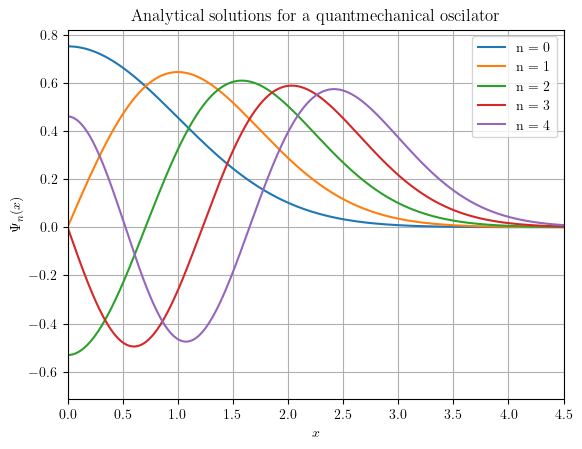

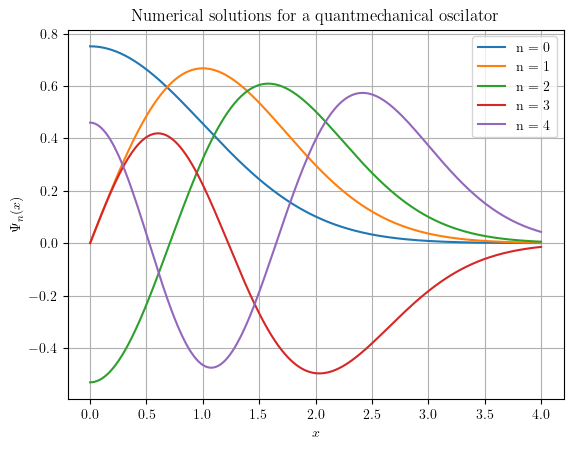

In [126]:
#plotting analytical solutions
def psi_n(n,x):
    g_n = H_n(i)
    return g_n(x)/(2**i*fac(i)*np.sqrt(np.pi))**(1/2)*np.exp(-x**2/2)

for i in range(0,5):
    x = np.linspace(-5,5,1000)
    plt.grid()
    plt.plot(x,psi_n(i,x), label = 'n = {}'.format(i))
plt.xlim(0,4.5)
plt.legend()
plt.ylabel(r'$\Psi$$_n$($x$)')
plt.xlabel(r'$x$')
plt.title(r'Analytical solutions for a quantmechanical oscilator')

#plotting nummerical solutions
fig2,ax2 = plt.subplots()
for i in range(0,5):
    y0,x0 = numerov(x0 = 0,n = i, h= 0.01, e = 4, k = k_0)
    ax2.plot(x0,y0, label = 'n = {}'.format(i))
    plt.legend()
plt.grid()
plt.ylabel(r'$\Psi$$_n$($x$)')
plt.xlabel(r'$x$')
plt.title(r'Numerical solutions for a quantmechanical oscilator')

We see taht the numerov algorithm is an highly accurate algorithm, whoever it is also visible, that because of the free parameter a, there might be some escalation errors while computing the solutions

# 2. Neutrons in the gravitational field 

In order to solve the equation numerically, we first normalize the given equation:
$$ \psi''(z) + \frac{2m}{\hbar}(E - mgz)\psi (z) = 0 $$
by introducing:
$$ x = \frac{z}{z_0} $$
in this way we get:
$$ \frac{d^2 \psi (x\cdot z_0)}{dx^2}\frac{dx^2}{dz^2} + \frac{2m}{\hbar}(E - mgz_0 \cdot x)\psi (x\cdot z_0) = 0$$

due to the linearity of the function $\psi$ we take the factor $z_0$ out of the argument of the equation and get:


$$ z_0 \frac{d^2 \psi (x)}{dx^2}\frac{1}{z_0^2} + \frac{2m}{\hbar}(E - mgz_0 \cdot x)z_0\cdot\psi (x) = 0$$
$$  \Longleftrightarrow \frac{d^2 \psi (x)}{dx^2} + \frac{2m}{\hbar}(E - mgz_0 \cdot x)z_0^2\cdot\psi (x) = 0$$
$$  \Longleftrightarrow \frac{d^2 \psi (x)}{dx^2} + (\frac{2m}{\hbar}Ez_0^2 - \frac{2m^2 g}{\hbar}z_0^3 \cdot x)\psi (x) = 0$$
from this variable transformation we get:
$$ z_0 = \left(\frac{2m^2 g}{\hbar}\right)^{1/3}$$

$$ \varepsilon = \frac{2m}{\hbar}Ez_0^2.$$
The normalized function read as followed:
$$ \psi ''(x) + (\varepsilon - x)\psi (x) = 0$$

In [148]:

def k_1(x, epsilon):
    return(epsilon - x**2)

def n_step2(y0,y1,x0,epsilon,h,k):
    yn = (2*(1-5/12*h**2*k(x0+h,epsilon))*y1 
            - (1+1/12*h**2*k(x0,epsilon))*y0)/(1+1/12*h**2*k(x0+2*h, epsilon))
    xn = x0+h
    return yn, xn

def numerov_2(y0,x0, epsilon,h,e,k):
    #number of steps
    N = int(e/h)
    
    yn = np.zeros((N+1))
    xn = np.zeros((N+1))
    
    #setting initial values for all variables 

    yn[0] = y0
    yn[1] = h
    
    xn[0] = x0
    xn[1] = x0+h
    
    #loop to integrate the yn
    for i in range(2,N+1):
        yn[i],  xn[i]=  n_step2(yn[i-2],yn[i-1],xn[i-2],epsilon,h,k)
    return yn,xn

## _a)_

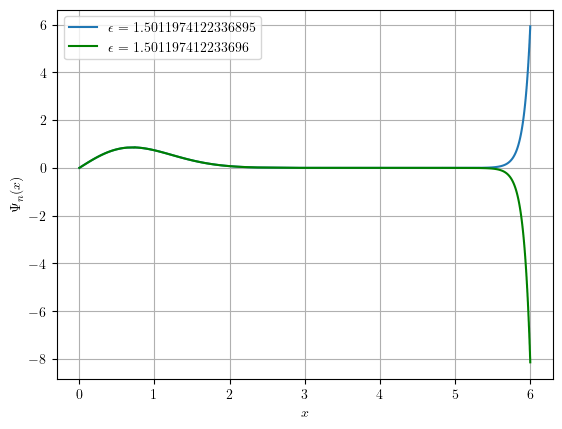

In [441]:
e1 = 1.5011974122336895
e2 = 1.501197412233696
y1,x1 = numerov_2(y0 = 0, x0 = 0,epsilon = e1, h = 0.001, e = 12, k = k_1)
y2,x2 = numerov_2(y0 = 0, x0 = 0,epsilon = e2, h = 0.001, e = 12, k = k_1)
plt.plot(x1,y1, label = r'$\epsilon$ = {}'.format(e1))
plt.plot(x2,y2, label = r'$\epsilon$ = {}'.format(e2), color = 'green')
plt.grid()
plt.ylabel(r'$\Psi$$_n$($x$)')
plt.xlabel(r'$x$')
plt.legend()


## _b)_

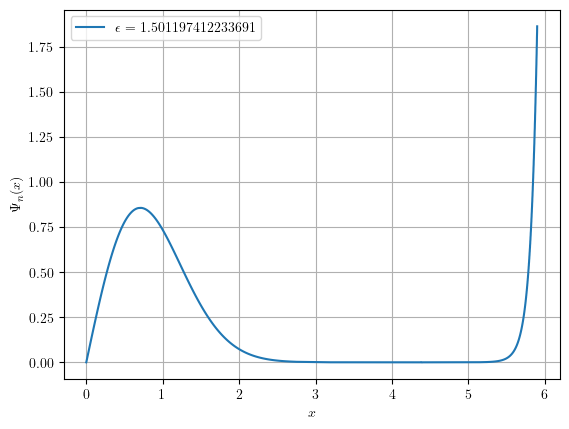

In [468]:
e1= 1.5011974122336911863225
y1,x1 = numerov_2(y0 = 0, x0 = 0,epsilon = e1, h = 0.001, e = 11.8, k = k_1)
plt.plot(x1,y1, label = r'$\epsilon$ = {}'.format(e1))
plt.grid()
plt.ylabel(r'$\Psi$$_n$($x$)')
plt.xlabel(r'$x$')
plt.legend()

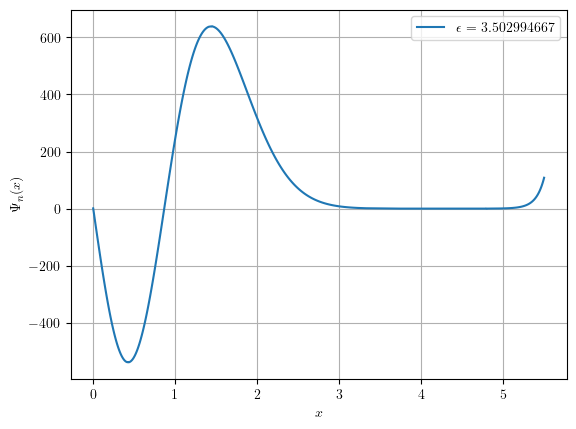

In [431]:
e1 = 3.502994667
y1,x1 = numerov_2(y0 = 1, x0 = 0,epsilon = e1, h = 0.001, e = 11, k = k_1)
plt.plot(x1,y1, label = r'$\epsilon$ = {}'.format(e1))
plt.grid()
plt.ylabel(r'$\Psi$$_n$($x$)')
plt.xlabel(r'$x$')
plt.legend()

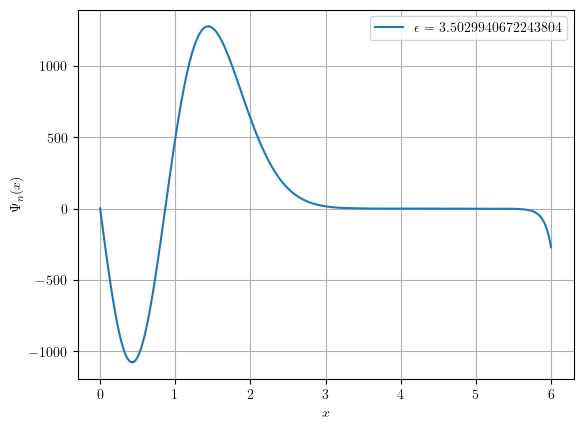

In [408]:
e1 = 3.502994067224380225766822155
y1,x1 = numerov_2(y0 = 2, x0 = 0,epsilon = e1, h = 0.001, e = 12, k = k_1)
plt.plot(x1,y1, label = r'$\epsilon$ = {}'.format(e1))
plt.grid()
plt.ylabel(r'$\Psi$$_n$($x$)')
plt.xlabel(r'$x$')
plt.legend()